# Exercises Repetition

In [30]:
import math                                                   # Mathematical functions
import pandas as pd                                           # Data manipulation
import numpy as np                                            # Scientific computing
import matplotlib.pyplot as plt                               # Data visualization
from scipy.stats import binom as binomial                     # Binomial distribution
from scipy.stats import t as student                          # Student distribution
from scipy.stats import chi2                                  # Chi-squared distribution
from scipy.stats import ttest_1samp                           # One-sample t-test
from scipy.stats import chisquare                             # Chi-squared test
from mlxtend.frequent_patterns import apriori                 # Apriori algorithm
from mlxtend.frequent_patterns import association_rules       # Association rules
from mlxtend.preprocessing import TransactionEncoder          # Transaction encoder

def rule_filter(row, min_len, max_len):
    length = len(row['antecedents']) + len(row['consequents'])
    return min_len <= length <= max_len

def get_item_list (string):
    items = string [1:-1]
    return items.split(';')

def plot_confidence_interval(population_size, sample_mean, sample_standard_deviation, degrees_freedom, plot_factor):
    margin_of_error = plot_factor * sample_standard_deviation / np.sqrt(population_size)
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    # Plotting the confidence interval
    plt.figure(figsize=(10, 6))
    x_axis = np.linspace(sample_mean - 3 * sample_standard_deviation, sample_mean + 3 * sample_standard_deviation, 1000)
    y_axis = student.pdf(x_axis, degrees_freedom, loc=sample_mean, scale=sample_standard_deviation / np.sqrt(population_size))

    plt.plot(x_axis, y_axis, label='t-distribution')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
    plt.axvline(sample_mean, color='green', linestyle='-', label='Sample Mean')

    # Mark the confidence interval
    plt.fill_betweenx(y_axis, lower_bound, upper_bound, where=(x_axis >= lower_bound) & (x_axis <= upper_bound), color='orange', label='Confidence Interval')

    plt.title('Confidence Interval Plot')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

## Theoretical questions

### Question 1:
The following probabilities are known from a dataset from the previous year. `79%` of students are taking the Data Science exam for the first time. Respectively `12.65%`, `4.30%` and `4.05%` of the students participate in the exam for the `2nd`, `3rd` and `4th` time. If the student participates for the first time, the chance that he or she will pass is `60%`. For the second, third and fourth participation, the chance of passing is `40%`, `12%` and `2%` respectively.

- 1.1. There is a `53.057%` chance that a randomly selected student from last year has passed. Write down the calculation that gives you this percentage based on the data from the exercise.

In [31]:
# = 0.6 * 0.79 + 0.4 * 0.1265 + 0.12 * 0.043 + 0.02 * 0.0405
totalProbability = 0.6 * 0.79 + 0.4 * 0.1265 + 0.12 * 0.043 + 0.02 * 0.0405
print("Total Probability:", totalProbability)

Total Probability: 0.53057


- 1.2.`24%` of the students who sat for the Data Science exam last year were baptized. The percentage of successful students for the group of baptized students is exactly the same as the percentage of successful students for the entire group. Suppose the teacher chooses one student from the entire group of students (who took the exam last year). What are the chances that this student was baptized and passed Data Science last year.

In [32]:
# P(Baptized and Passed) = P(Baptized) * P(Passed | Baptized)
productRule = totalProbability * 0.24
print("Product Rule:", productRule)

Product Rule: 0.1273368


- 1.3. The teacher calls on `15` students who participated for the first time last year the exam. What is the probability that 10 or more students have passed?

In [33]:
# Binomial Distribution
print(1 - binomial.cdf(9, 15, 0.6))

0.403215550414848


### Question 2:
The average study time per course is `4.5 hours` per week in the course. We want to determine whether the study time of the course differs significantly from the average for the Data Science course (based on a sample). Use the input file for this `/StudyResult.csv`.

In [34]:
studyResult = pd.read_csv('../Data/StudyResult.csv', delimiter=';', decimal=',')

In [35]:
display(studyResult.head())

,studentID,gender,residence,Education_Mother,study time,#participations,partying,Absences,Score1,Score2,Score3,Result
0,1,F,City,Master,4.4,1,Several times a week,6,5,6,6,Fail
1,2,F,City,Primary education,5.2,1,Once a week,4,5,5,6,Fail
2,3,F,City,Primary education,4.7,4,Rarely,10,7,8,10,Fail
3,4,F,City,Master,5.8,1,Rarely,2,15,14,15,Pass
4,5,F,City,Bachelor,4.2,1,Rarely,4,6,10,10,Fail


- 2.1. What alternative hypothesis can we use?

In [36]:
# H0: The average study time of the population is 4.5 HOURS (= 4.5)
# H1: The average study time of the population is not 4.5 HOURS (!= 4.5)

- 2.2 What is the acceptance interval for the study time of the course at `a=0.05`? Also write down how you arrived at this number.

In [37]:
alpha = 0.05
x_bar = studyResult['study time'].mean()
s = studyResult['study time'].std()
n = len(studyResult)
df = n - 1
p = 1 - alpha

interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s/math.sqrt(n))
print("Confidence Interval:",interval)

Confidence Interval: (3.8767239334848833, 4.273655813350561)


- 2.3. What value for the factor did you use to calculate the acceptance interval?

In [38]:
factor = student.ppf(p, df=df) # factor = Z-score
print("Factor:",factor)

Factor: 1.6487302260963181


- 2.4. What can you say about the null hypothesis?

In [39]:
p_value = ttest_1samp(studyResult['study time'], 4.5).pvalue
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


- 2.5. Calculate the p-value that you can use to support this claim (at `a=0.05`)

In [40]:
print(p_value)

3.19125975826884e-05


- 2.6. Form a conclusion based on the p-value. Complete the following sentence (in any case, use the obtained p-value in your conclusion): If the average study duration of the population is `4.5 HOURS`, then

In [41]:
print(f"If the average study duration of the population is 4.5 HOURS, then the probability of observing students who study more or less than 4.5 HOURS is {p_value}.")

If the average study duration of the population is 4.5 HOURS, then the probability of observing students who study more or less than 4.5 HOURS is 3.19125975826884e-05.


### Question 3:
We want to know whether the going out behavior of our students differs from those of the University From a survey of all students of the
university shows the following distribution:

|                   | Behavior College | Measured education absolutely |
|-------------------|------------------|-------------------------------|
| Never             | 5.00%            | 23                            |
| Occasionally      | 30.00%           | 103                           |
| Weekly            | 35.00%           | 130                           |
| More times a week | 20.00%           | 86                            |
| Daily             | 10.00%           | 53                            |


In [42]:
measured_values = [23, 103, 130, 86, 53]
total = sum(measured_values)
expected_values = [total * 0.05, total * 0.3, total * 0.35, total * 0.2, total * 0.1]
data = chisquare(measured_values, expected_values)

3.1. Calculate x^2

In [43]:
print("X^2 Value:", round(data.statistic,3))

X^2 Value: 8.289


3.2. What is the p value for this distribution?

In [44]:
print("P Value:", round(data.pvalue,3))

P Value: 0.082


3.3. I want to make a decision with reliability of `90%`. Which decision do I take?

In [45]:
p = 0.90
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)
print("Critical value:",critical_value)

if data.statistic < critical_value:
    print("H0 can not be rejected with 90% confidence.")
else:
    print("H0 can be rejected with 90% confidence.")

Critical value: 7.779440339734858
H0 can be rejected with 90% confidence.


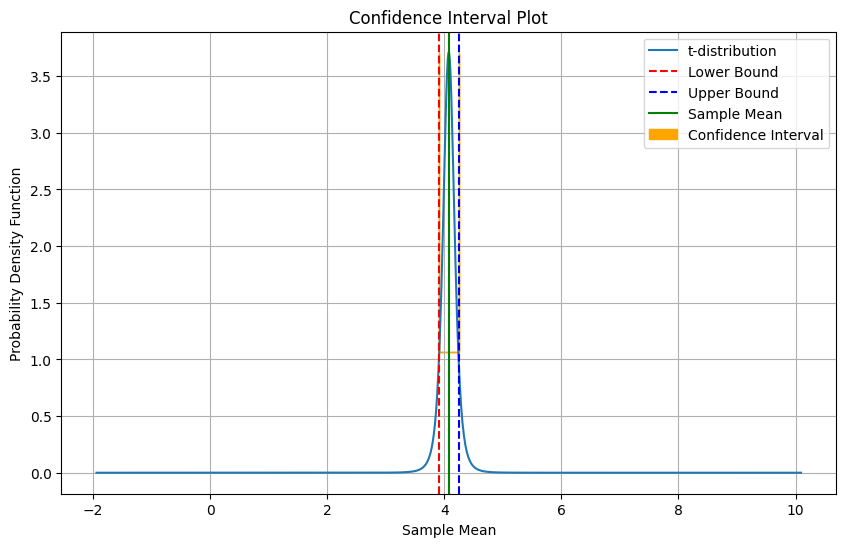

In [46]:
plot_confidence_interval(n, x_bar, s, df, factor)

### Question 4:
A store has analyzed a number of shopping carts. Look for the association rules.

4.1. Read the `Groceries.csv` file.

In [47]:
groceries = pd.read_csv('../Data/Groceries.csv', delimiter=',')

In [48]:
display(groceries.head())

,transaction,items
0,1,{citrus fruit;semi-finished bread;margarine;re...
1,2,{tropical fruit;yogurt;coffee}
2,3,{whole milk}
3,4,{pip fruit;yogurt;cream cheese ;meat spreads}
4,5,{other vegetables;whole milk;condensed milk;lo...


4.2. To convert the items in string format to an n-dimensional array you can do the following perform conversion.
```python
transactions = groceries['items'].apply(lambda row: row[1:-1].split(';')).to_numpy();

# For each list of items in form {item 1, item 2, item 3}
#1. Remove the curly braces with [1:-1]
#2. Split based on “;”
#3. Convert the panda Series to a numpy ndarray
```

In [49]:
transactions = groceries['items'].apply(get_item_list).to_numpy()

In [50]:
te = TransactionEncoder()
dataset = te.fit(transactions).transform(transactions)
transactionstable = pd.DataFrame(dataset,columns=te.columns_)

In [51]:
display(transactionstable)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


4.3. Create the association rules with the `apriori algorithm` based on the following parameters:
- minimum support = `0.05`
- minimum confidence = `0.1`
- minimum lengte = `2`
- maximum lengte = `5`


In [52]:
min_support = 0.05
min_confidence = 0.1
min_lengte = 2
max_lengte = 5

In [53]:
# Apriori algorithm
item_sets_apriori = apriori(transactionstable, min_support=min_support, use_colnames=True, max_len=max_lengte)
display(item_sets_apriori.head())

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)


In [54]:
rules_apriori = association_rules(item_sets_apriori, metric='confidence', min_threshold=min_confidence)
display(rules_apriori.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732


4.4. Look up the line yogurt → whole milk. Is this a good line? Rate based on Support, Confidence and Lift.

In [55]:
print("Lift", rules_apriori.sort_values(by='confidence', ascending=False).head(1)['lift'].values[0])
print("Confidence", rules_apriori.sort_values(by='confidence', ascending=False).head(1)['confidence'].values[0])

Lift 1.5717351405345266
Confidence 0.40160349854227406


### Question 5:
A theoretical driving test contains `50` multiple choice questions. You must get `43/50` to pass. Suppose each multiple-choice question has `4` possible answers.

5.1. What is the chance of success (`43/50`) when you only gamble (`4` options)?

In [56]:
# Binomial Distribution
# 1 - binomial.cdf(x, y, z)
# x = Is the number of successes in the sample.
# y = Is the number of trials.
# z = Is the probability of success on each trial.
print(1 - binomial.cdf(42, 50, 1/4)) # 42 = 43 - 1

0.0


5.2. What is the chance of passing if you are sure of `35` questions (and therefore have guessed `15` times)?

In [57]:
# Binomial Distribution
# 1 - binomial.cdf(x, y, z)
# x = Is the number of successes in the sample.
# y = Is the number of trials.
# z = Is the probability of success on each trial.
print(1 - binomial.cdf(28, 35, 1/4))# 28 = 43 - 15

1.0728085086952888e-12


5.3. What is the probability of passing (`43/50`) if you are just guessing and there are only `2` options per question?

In [58]:
# Binomial Distribution
# 1 - binomial.cdf(x, y, z)
# x = Is the number of successes in the sample.
# y = Is the number of trials.
# z = Is the probability of success on each trial.
print(1 - binomial.cdf(42, 50, 1/2)) # 42 = 43 - 1

1.049338713698944e-07
